In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt 
import seaborn as sns 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#TO DISPLAY STATS ABOUT THE DATA 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to display the no of samples on each class 
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

preprocessing the dataset 

In [6]:
#CHECK THE NULL VALUES 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

exploratory data analysis

<Axes: >

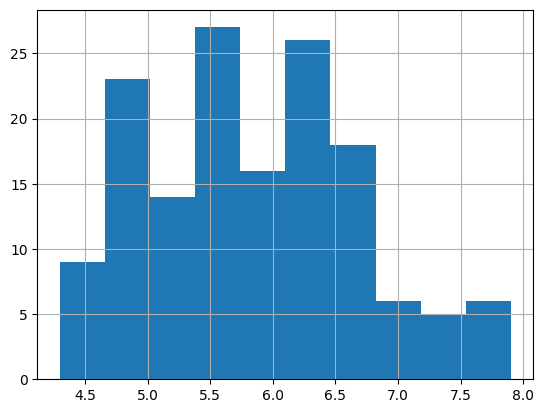

In [7]:
df['sepal_length'].hist()

<Axes: >

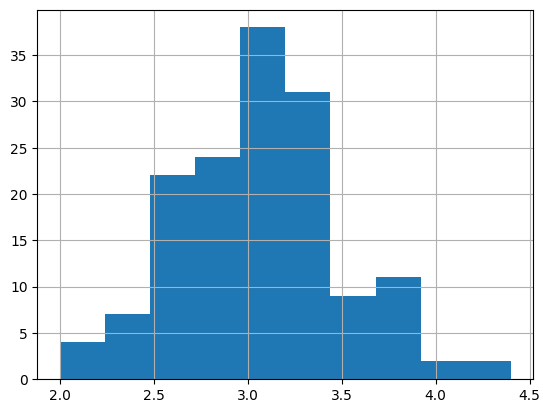

In [8]:
df['sepal_width'].hist()

<Axes: >

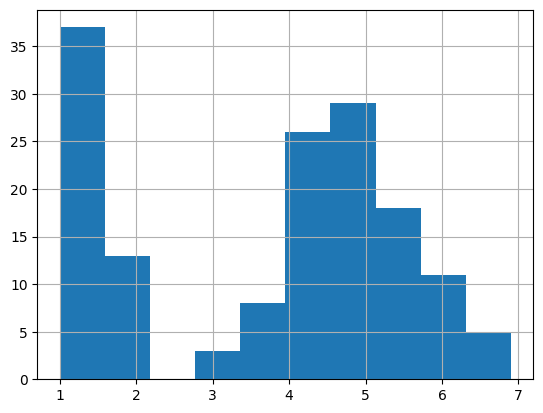

In [9]:
df['petal_length'].hist()

<Axes: >

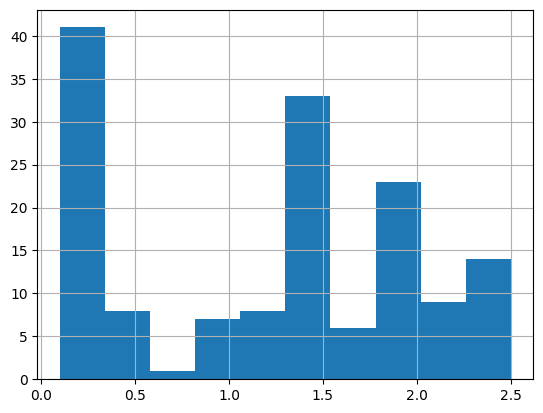

In [10]:
df['petal_width'].hist()

In [11]:
#SCATTER PLOT 
colors =['red', 'orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

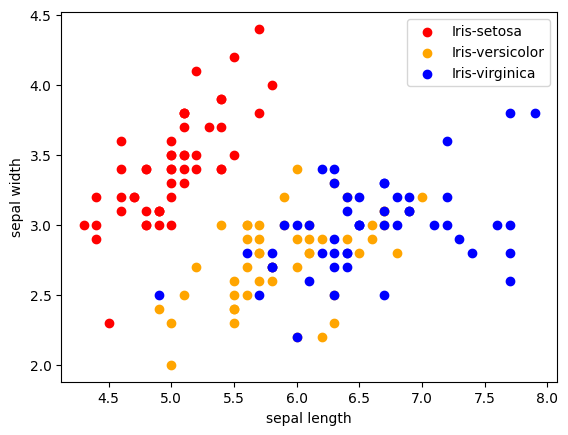

In [12]:
for i in range(3) : 
    x= df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend()

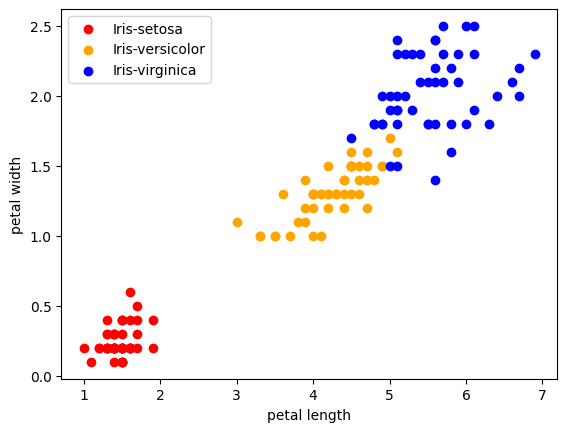

In [13]:
 for i in range(3): 
    x= df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()

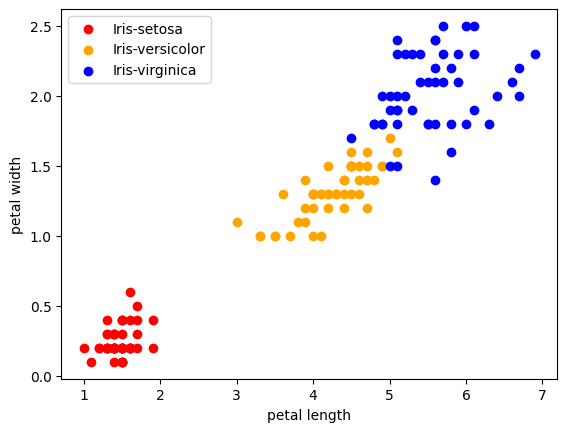

In [14]:
 for i in range(3) : 
    x= df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()

In [15]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#model training 
from sklearn.model_selection import train_test_split

In [17]:
X= df.drop(columns=['species'])
Y= df['species']

x_train,x_test ,y_train , y_test = train_test_split(X,Y,test_size = 0.30)
#logistic regression 
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#print metric to get performance 
print("accuracy:" ,model.score(x_test , y_test)*100)

accuracy: 93.33333333333333


In [19]:
# kmn - k nearest neighbours 
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train , y_train )

KNeighborsClassifier()

In [20]:
#print metric to get performance 
print("accuracy:" ,model.score(x_test , y_test)*100)

accuracy: 95.55555555555556


In [21]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train , y_train )

DecisionTreeClassifier()

In [22]:
#print metric to get performance 
print("accuracy:" ,model.score(x_test , y_test)*100)

accuracy: 93.33333333333333
